In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
print(trainset)
print(testset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test


In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

torch.Size([3, 36, 138])
plane  ship  frog   cat


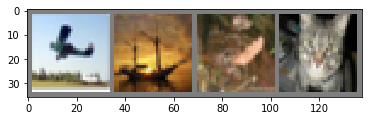

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy() # shape = (3,36,138)
  plt.imshow(np.transpose(npimg, (1,2,0))) # imshow(m,n,c) (36,138,3)
 
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(torchvision.utils.make_grid(images).size())
imshow(torchvision.utils.make_grid(images)) # make_grid 쓰면 자동으로 그리드 만들어줌
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [27]:
# Max-pooling 하면 image size가  odd일 때는 어떻게 처리하지? 테스트
class NetT(nn.Module):
    def __init__(self):
        super(NetT, self).__init__()
        self.pool = nn.MaxPool2d(2,2)
        
    def forward(self, x):
        return self.pool(x)

In [18]:
x = torch.rand(1,1,5,5)
x

tensor([[[[0.2559, 0.7449, 0.9085, 0.4704, 0.0895],
          [0.0398, 0.7329, 0.6802, 0.7012, 0.5585],
          [0.6755, 0.9406, 0.8567, 0.7186, 0.2992],
          [0.2912, 0.0481, 0.7616, 0.5876, 0.3506],
          [0.8591, 0.2612, 0.7863, 0.5009, 0.6717]]]])

In [19]:
nett = NetT()
y = nett(x)
y, y.size()

(tensor([[[[0.7449, 0.9085],
           [0.9406, 0.8567]]]]), torch.Size([1, 1, 2, 2]))

In [ ]:
# Max-pooling 할 때 맨 뒷자리를 ㅂㅓ리는듯?

In [30]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 32 * 32 이미지가 conv > pooling > conv > pooling하면 5*5 됨
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [31]:
net = Net()

In [94]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)

In [105]:
expp = torch.exp(input)
input,expp,target

(tensor([[-0.6794, -1.7731,  0.5752,  0.2017,  0.6027],
         [ 0.4750, -0.9852, -0.7233, -1.4471,  0.0276],
         [ 0.3681, -0.3639, -0.5184, -1.9810,  1.1750]]),
 tensor([[0.5069, 0.1698, 1.7775, 1.2235, 1.8271],
         [1.6080, 0.3734, 0.4852, 0.2352, 1.0280],
         [1.4450, 0.6949, 0.5955, 0.1379, 3.2382]]),
 tensor([2, 4, 4]))

In [103]:
tt =expp.numpy()
ss = tt.sum(1).reshape(3,-1)
sm = tt/ss
sm,np.sum(tt/ss,1), 

(array([[0.09208634, 0.03084629, 0.32290196, 0.22226192, 0.33190352],
        [0.43112537, 0.10010336, 0.13008204, 0.06307417, 0.27561504],
        [0.2364351 , 0.11371152, 0.09743676, 0.02256999, 0.5298466 ]],
       dtype=float32), array([1., 1., 1.], dtype=float32))

In [110]:
-np.sum(np.log(sm[i,target[i]]) for i in range(3))/3

G:\Anaconda3\envs\PyTorch_ev\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


1.0181081295013428

In [109]:
input,expp, torch.log(expp),target, output

(tensor([[-0.6794, -1.7731,  0.5752,  0.2017,  0.6027],
         [ 0.4750, -0.9852, -0.7233, -1.4471,  0.0276],
         [ 0.3681, -0.3639, -0.5184, -1.9810,  1.1750]]),
 tensor([[0.5069, 0.1698, 1.7775, 1.2235, 1.8271],
         [1.6080, 0.3734, 0.4852, 0.2352, 1.0280],
         [1.4450, 0.6949, 0.5955, 0.1379, 3.2382]]),
 tensor([[-0.6794, -1.7731,  0.5752,  0.2017,  0.6027],
         [ 0.4750, -0.9852, -0.7233, -1.4471,  0.0276],
         [ 0.3681, -0.3639, -0.5184, -1.9810,  1.1750]]),
 tensor([2, 4, 4]),
 tensor(1.0181))

 드디어 해결 sb... 결국 Cross Entropy Error 는 다음 식을 말한다.
 
 $-\frac{1}{m}\sum_i\sum_k(y^i_k\log(softmax(output))$
 where $k \in ${classes} and $m$ is the number of samples.

In [32]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)
# optimizer = optim.Adam(net.parameters(), lr = 0.001, weight_decay = 1e-4)

In [10]:
import time

In [29]:
d=0
for i , data in enumerate(trainloader):
    print(i)
    d+=1
    
    if d==10:
        break

0
1
2
3
4
5
6
7
8
9


In [11]:

start = time.time()  # 시작 시간 저장
for epoch in range(2):
  
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    
    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training!')
print("time :", time.time() - start) 

[1,  2000] loss: 2.204
[1,  4000] loss: 1.877
[1,  6000] loss: 1.715
[1,  8000] loss: 1.624
[1, 10000] loss: 1.528
[1, 12000] loss: 1.491
[2,  2000] loss: 1.409
[2,  4000] loss: 1.381
[2,  6000] loss: 1.375
[2,  8000] loss: 1.365
[2, 10000] loss: 1.323
[2, 12000] loss: 1.305
Finished Training!
time : 463.5393259525299


In [33]:
optimizer = optim.Adam(net.parameters(), lr = 0.001, weight_decay = 1e-4)
start = time.time()  # 시작 시간 저장
for epoch in range(2):
  
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    
    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training!')
print("time :", time.time() - start) 

[1,  2000] loss: 1.880
[1,  4000] loss: 1.603
[1,  6000] loss: 1.510
[1,  8000] loss: 1.446
[1, 10000] loss: 1.381
[1, 12000] loss: 1.386
[2,  2000] loss: 1.301
[2,  4000] loss: 1.279
[2,  6000] loss: 1.253
[2,  8000] loss: 1.260
[2, 10000] loss: 1.256
[2, 12000] loss: 1.250
Finished Training!
time : 736.4469220638275


learning rate를 바꿔가면서 loss 추이를 관찰해보면 좋다!

GroundTruth :    cat  bird  bird   cat


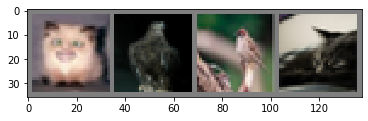

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth : ', ' '.join('%5s' % classes [labels[j]] for j in range(4)))

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   cat  deer   cat


In [34]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))    

Accuracy of the network on the 10000 test images: 54 %


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs,1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
      
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 58 %
Accuracy of  bird : 30 %
Accuracy of   cat : 23 %
Accuracy of  deer : 61 %
Accuracy of   dog : 34 %
Accuracy of  frog : 71 %
Accuracy of horse : 51 %
Accuracy of  ship : 76 %
Accuracy of truck : 70 %


In [17]:
l = torch.tensor([[1,0,3]])
l

tensor([[1, 0, 3]])

In [18]:
l.squeeze()

tensor([1, 0, 3])

In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [20]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [21]:
for epoch in range(2):
  
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training!')

RuntimeError: expected backend CPU and dtype Float but got backend CUDA and dtype Float

In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs,1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
      
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 61 %
Accuracy of  bird : 57 %
Accuracy of   cat : 37 %
Accuracy of  deer : 17 %
Accuracy of   dog : 28 %
Accuracy of  frog : 74 %
Accuracy of horse : 65 %
Accuracy of  ship : 62 %
Accuracy of truck : 65 %
